In [44]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### 1. Creating a 6*8 Image

#### 1.1 A Grayscale Image

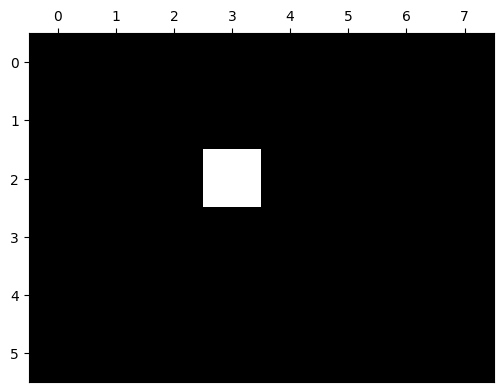

In [46]:
im = np.zeros((6,8), dtype=np.uint8)
im[2,3] = 255
fig, ax = plt.subplots(1, 1, figsize=(6,8))
ax.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.xaxis.set_ticks_position('top')
plt.show()

#### 1.2 A Colour Image

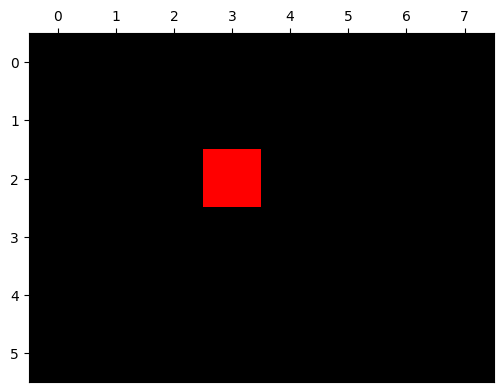

In [47]:
im = np.zeros((6,8,3), dtype=np.uint8)
im[2,3] = [255, 0, 0]
fig, ax = plt.subplots(1, 1, figsize=(6,8))
ax.imshow(im)
ax.xaxis.set_ticks_position('top')
plt.show()

### 2. Image Opening and Displaying

#### 2.1 Displaying using Matplotlib

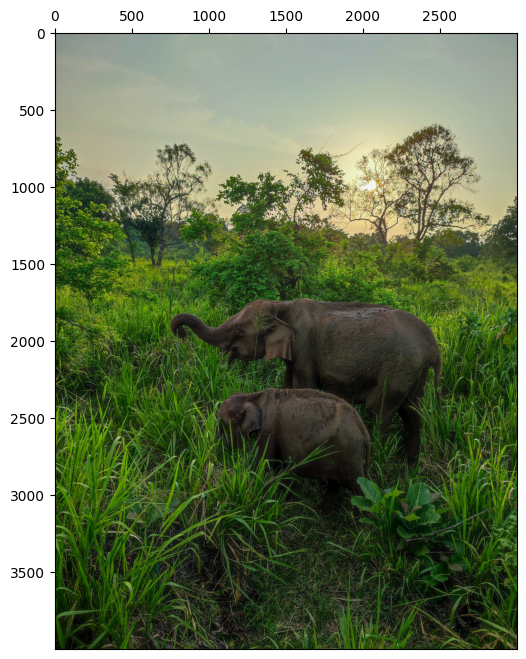

In [48]:
im = cv.imread('images/elephants.jpg')
fig, ax = plt.subplots(1, 1, figsize=(6,8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

#### 2.2 Displaying using OpenCV

In [49]:
im = cv.imread('images/elephants.jpg')

# Resize to fit screen (e.g., 800×600)
scale_percent = 20  # percent of original size
width = int(im.shape[1] * scale_percent / 100)
height = int(im.shape[0] * scale_percent / 100)
resized = cv.resize(im, (width, height), interpolation=cv.INTER_AREA)

cv.imshow('Image', resized)
cv.waitKey(0)
cv.destroyAllWindows()

### 3. Image Properties

In [50]:
print(f'Images Shape : {im.shape}')
print(f'Images Size : {im.size}')
print(f'Image Data Type : {im.dtype}')

Images Shape : (4000, 3000, 3)
Images Size : 36000000
Image Data Type : uint8


### 4. Increasing the Brightness

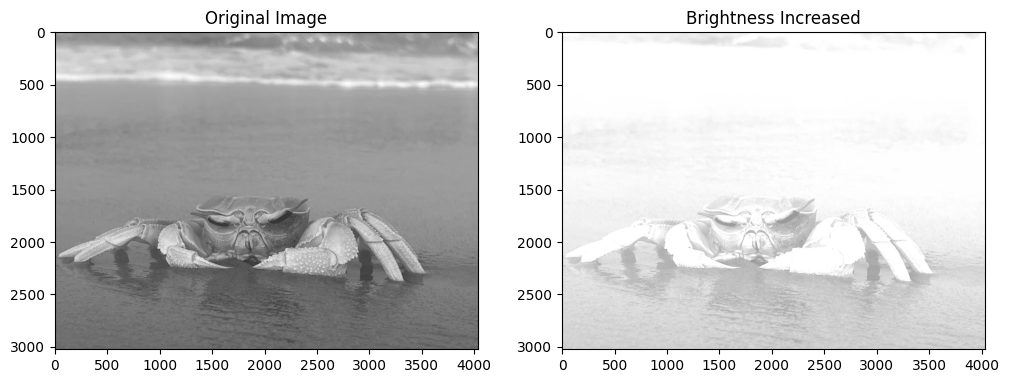

In [51]:
im_1 = cv.imread('images/crab.jpg', cv.IMREAD_GRAYSCALE)
im_2 = cv.add(im_1, 100)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(im_2, cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Brightness Increased")

#for a in ax:
    #a.axis('off')

plt.show()

### 5. Obtaining One Colour Plane

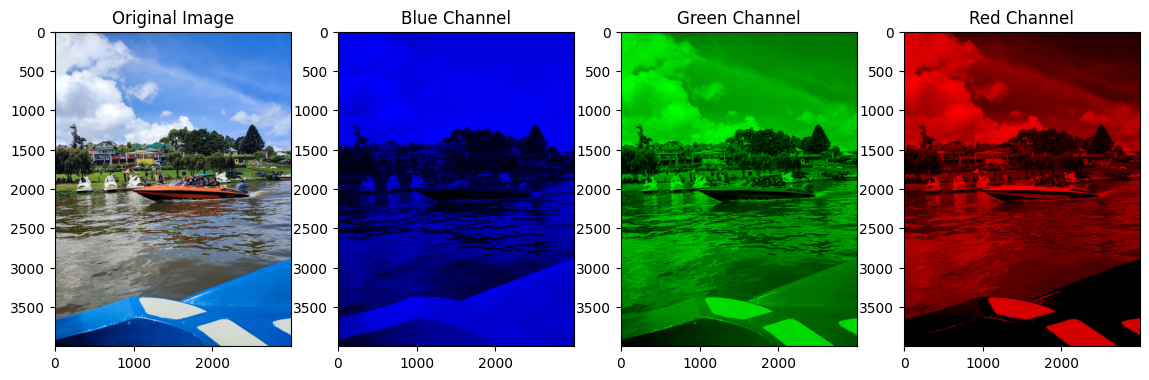

In [52]:
im = cv.imread('images/colourful.jpg') # BGR image
im_blue = im.copy()
im_blue[:, :, 1] = 0
im_blue[:, :, 2] = 0

im_green = im.copy()
im_green[:, :, 0] = 0
im_green[:, :, 2] = 0

im_red = im.copy()
im_red[:, :, 0] = 0
im_red[:, :, 1] = 0

fig, ax = plt.subplots(1, 4, figsize=(14, 12))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_blue, cv.COLOR_BGR2RGB))
ax[1].set_title('Blue Channel')
ax[2].imshow(cv.cvtColor(im_green, cv.COLOR_BGR2RGB))
ax[2].set_title('Green Channel')
ax[3].imshow(cv.cvtColor(im_red, cv.COLOR_BGR2RGB))
ax[3].set_title('Red Channel')

plt.show()


### 6. Sampling and Reconstruction

### 7. Image Resampling and Interpolation

#### 7.1 Demosaicing

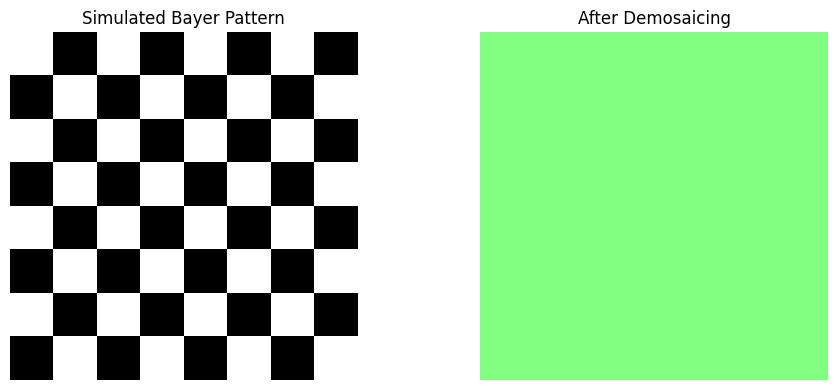

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Simulate a Bayer pattern with color variation
bayer_color = np.zeros((8, 8), dtype=np.uint8)

# Create a pattern: Red on even rows, Blue on odd rows
for i in range(8):
    for j in range(8):
        if i % 2 == 0:
            if j % 2 == 0:
                bayer_color[i, j] = 255  # Red pixel
            else:
                bayer_color[i, j] = 128  # Green pixel
        else:
            if j % 2 == 0:
                bayer_color[i, j] = 128  # Green pixel
            else:
                bayer_color[i, j] = 255  # Blue pixel

# Apply demosaicing
color_result = cv2.cvtColor(bayer_color, cv2.COLOR_BayerGR2BGR)

# Display
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Simulated Bayer Pattern")
plt.imshow(bayer_color, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("After Demosaicing")
plt.imshow(cv2.cvtColor(color_result, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


### 8. Intensity Transformations

#### 8.1 Identity Transform T(.) = 1
- Nothing changes in output image

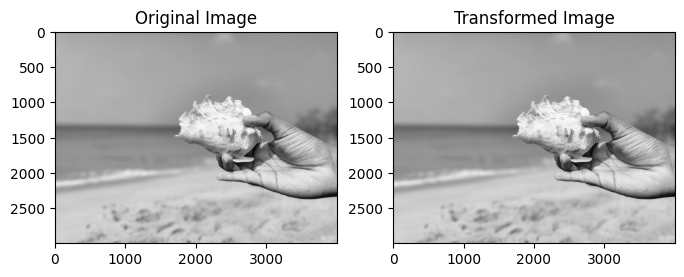

In [54]:
f = cv.imread('images/seashell.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g = t[f]

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')

plt.show()

#### 8.2 Negative transformation

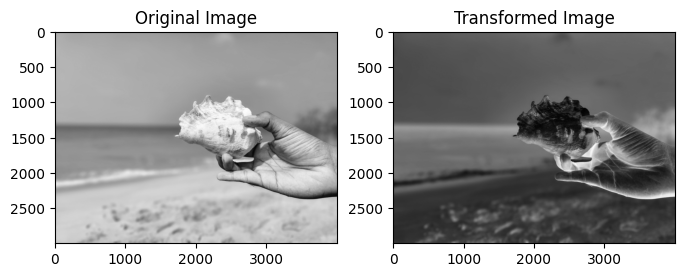

In [55]:
f = cv.imread('images/seashell.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(255, -1, -1, dtype=np.uint8) # start, stop, step
g = t[f]

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')

plt.show()

#### 8.3 Intensity Windowing

256


Text(0.5, 1.0, 'Transformed Image')

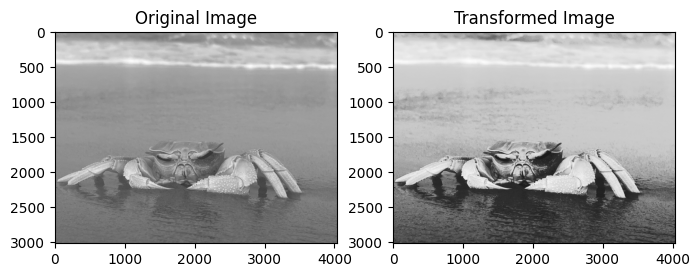

In [56]:
c = np.array([(100, 50), (150, 200)])

t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1]+1, 255, 255-c[1,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

image_orig = cv.imread('images/crab.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(image_orig, transform)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(image_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')


#### 8.4 Gamma Correction

##### 8.4.1 Dakening the image (gamma > 1)

Text(0.5, 1.0, 'Transformed Image')

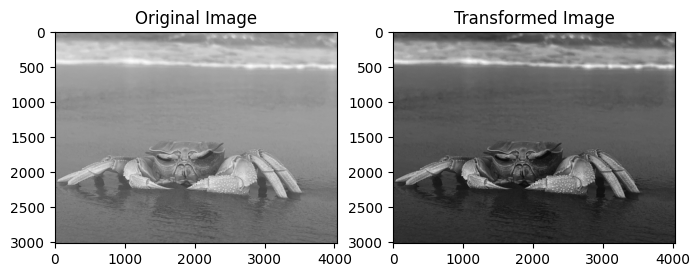

In [57]:
gamma1 = 2
t = np.array([(i/255.0)**(gamma1)*255 for i in np.arange(0, 256)]).astype('uint8')

g = cv.LUT(image_orig, t)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(image_orig, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')


##### 8.4.2 Brightening the image (gamma < 1)

Text(0.5, 1.0, 'Transformed Image')

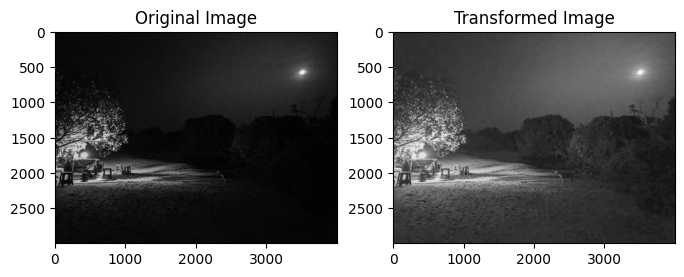

In [58]:
gamma2 = 0.5
t = np.array([(i/255.0)**(gamma2)*255 for i in np.arange(0, 256)]).astype('uint8')

im = cv.imread('images/night.jpg', cv.IMREAD_GRAYSCALE)
g = cv.LUT(im, t)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')


#### 8.5 Histograms

##### 8.5.1 Histogram Equalization using OpenCV

Text(0.5, 1.0, 'Transformed Image')

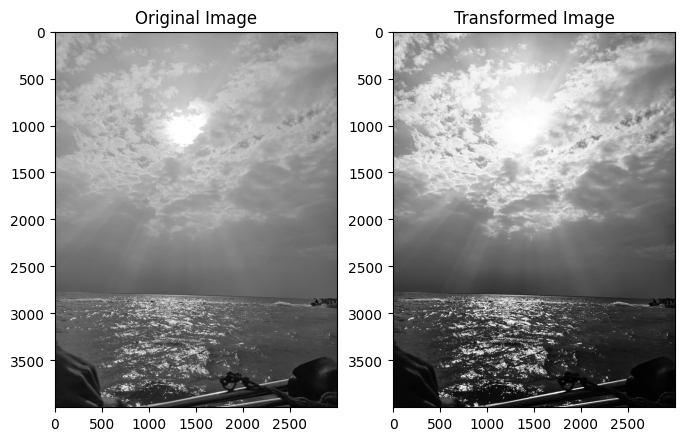

In [59]:
f = cv.imread('images/sun-and-sea.jpg', cv.IMREAD_GRAYSCALE)
g = cv.equalizeHist(f)

fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
ax[1].set_title('Transformed Image')